In [20]:
#!/usr/bin/env python
# Ahmad Al - Imtiaz; email: ahmadal.imtiaz@gmail.com
# 11 Jan 2023

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as spo

#### Spectral Axis unit - Angstrom
#### Intensity unit - erg/cm^2/s/A 

In [54]:
#Data Observer frame

data = pd.read_csv('./ngc_4235.csv')
data.columns
#data
data = data.rename(columns={'Spectral-axis   ': 'spectral_axis'})
data = data.rename(columns={'        Intensity      ': 'Intensity'})

In [55]:
data.columns

Index(['spectral_axis', 'Intensity'], dtype='object')

In [57]:
wave_obs = np.array(data.spectral_axis) #[Angstrom]
flux_den_obs = np.array(data.Intensity) #[erg/cm^2/s/A]

In [59]:
#Constants
z = 0.00755
dis_src = 32.7 #Mpc
dis_src = dis_src * 3.08567758e24 #cm
print(dis_src)
c = 3* 10**8 #m/s
f = 3/4
G = 6.6743 * (10**-11) #m^3/kg/s^2

1.0090165686600001e+26


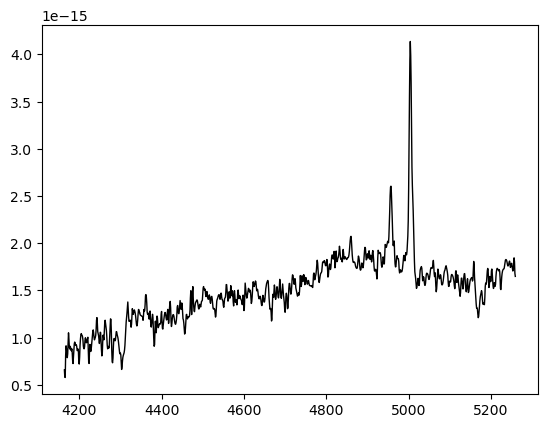

In [60]:
wave_obs = np.array(data.spectral_axis) #[Angstrom]
flux_den_obs = np.array(data.Intensity) #[erg/cm^2/s/A]

plt.plot(wave_obs, flux_den_obs, "black", linewidth=1)
plt.show()

In [62]:
#Source frame
wave_src = wave_obs/(1+z) #Angstrom
flux_den_src = flux_den_obs*(1+z) #erg/cm^2/s/A
lum_src = (flux_den_src * 4 * np.pi * dis_src**2) *wave_src #erg/s

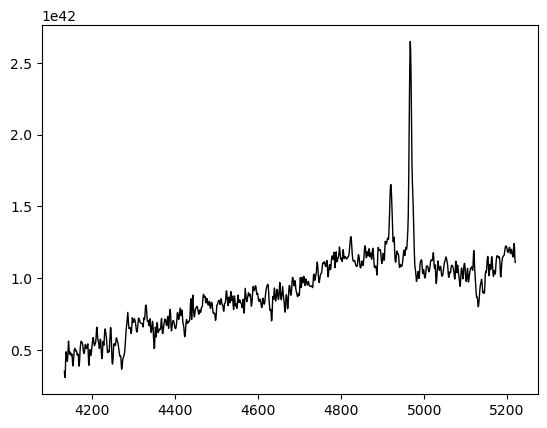

In [63]:
plt.plot(wave_src, lum_src, "black", linewidth=1)
plt.show()

In [83]:
wave_obs[0]

4164

In [110]:
wave_src[860]

4986.353034588855

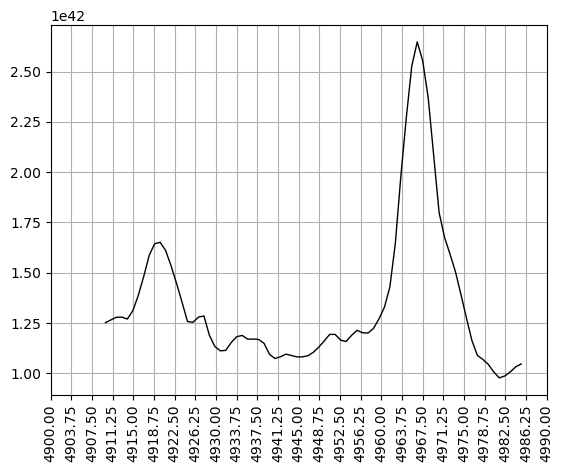

In [144]:
plt.plot(wave_src[783:860], lum_src[783:860], "black", linewidth=1)
plt.grid()
plt.xticks(np.linspace(4900,4990, 25), rotation = 90)
plt.show()

In [115]:
X = wave_src[783:860]
Y = lum_src[783:860]

In [116]:
#defining model

def model(x, amp1, mu1, sig1, c1,
          amp2, mu2, sig2, c2,
          amp3, mu3, sig3, c3,
          amp4, mu4, sig4, c4):
    
    func_val1 = c1 + amp1 * np.exp(-np.power(x - mu1, 2.)/(2 * np.power(sig1, 2.))) #HalphaNarrow
    func_val2 = c2 + amp2 * np.exp(-np.power(x - mu2, 2.)/(2 * np.power(sig2, 2.))) #Halphabroad
    func_val3 = c3 + amp3 * np.exp(-np.power(x - mu3, 2.)/(2 * np.power(sig3, 2.))) #O[III]Narrow
    func_val4 = c4 + amp4 * np.exp(-np.power(x - mu4, 2.)/(2 * np.power(sig4, 2.))) #O[III]Broad
    
    return func_val1 + func_val2 + func_val3 + func_val4 - c2 - c3 - c4
    

In [372]:
#curve fitting

def gaussian(x, amp, mu, sig, c):
    func_val = c + amp * np.exp(-np.power(x - mu, 2.)/(2 * np.power(sig, 2.)))
    return func_val

initial_guess = [
                0.3*(10**42), 4920, 2, 1.20*(10**42),  #HalphaNarrow: amp1, mu1, sig1, c1
                0.2*(10**42), 4920, 3, 1.20*(10**42),  #Halphabroad: amp2, mu2, sig2, c2
                1.1*(10**42), 4967, 1.5, 1.15*(10**42), #O[III]Narrow: amp3, mu3, sig3, c3
                0.5*(10**42), 4969, 4, 1.15*(10**42), #O[III]Broad: amp4, mu4, sig4, c4
            ]
bund = (
        (0.1*(10**42), 4918, 1, 1.1*(10**42),  #lower: HalphaNarrow: amp1, mu1, sig1, c1
        0.1*(10**42), 4918, 2, 1.1*(10**42), #lower: Halphabroad: amp2, mu2, sig2, c2
        0.8*(10**42), 4962, 1, 1.0*(10**42), #lower: O[III]Narrow: amp3, mu3, sig3, c3
        0.3*(10**42), 4967, 2, 1.0*(10**42), #lower: O[III]Broad: amp4, mu4, sig4, c4
        ), #All lower in a tuple
        
        (0.5*(10**42), 4922, 4, 1.3*(10**42), #upper: HalphaNarrow: amp1, mu1, sig1, c1
        0.3*(10**42), 4922, 5, 1.3*(10**42),  #upper: Halphabroad: amp2, mu2, sig2, c2
        1.3*(10**42), 4970, 3, 1.3*(10**42), #upper: O[III]Narrow: amp3, mu3, sig3, c3
        0.7*(10**42), 4970, 5, 1.3*(10**42),  #upper: O[III]Broad: amp4, mu4, sig4, c4
        ) #All upper in a tuple
        
    )

popt, pcov = spo.curve_fit(model, X, Y, p0 = initial_guess, bounds = bund)
print(popt)
yfit = model(X, *popt)
yfit1 = gaussian(X, *popt[0:4])
yfit2 = gaussian(X, *popt[4:8])
yfit3 = gaussian(X, *popt[8:12])
yfit4 = gaussian(X, *popt[12:16])

[3.00000000e+41 4.91998822e+03 2.01359075e+00 1.20000000e+42
 2.00000000e+41 4.91999298e+03 3.01131893e+00 1.20000000e+42
 1.10000000e+42 4.96643156e+03 1.79981009e+00 1.15000000e+42
 5.00000000e+41 4.96892249e+03 4.03623043e+00 1.15000000e+42]


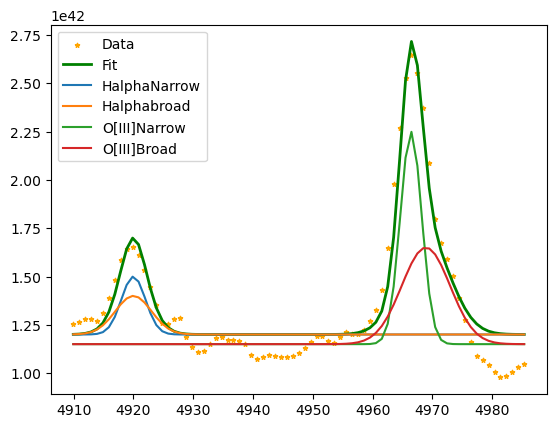

In [373]:
plt.scatter(X, Y, s=10, c='Orange', marker='*', label = "Data")
plt.plot(X, yfit, "green", linewidth=2, label = "Fit")
plt.plot(X, yfit1, label = "HalphaNarrow")
plt.plot(X, yfit2, label = "Halphabroad")
plt.plot(X, yfit3, label = "O[III]Narrow")
plt.plot(X, yfit4, label = "O[III]Broad")
plt.legend()
plt.show()

In [374]:
# Finding values
lum_5100 = gaussian(5100, *popt[8:12]) #erg/s
print("O[III](5100)",lum_5100)
FWHM = 2.3548*popt[6] #need to correct for func2 
print("FWHM1",FWHM)
V = (c*FWHM)/4863 #m/s
R = 2.59* 10**13 * 10**(1.527 + (0.533*np.log10((lum_5100/(10**44))))) #m


M_BH = f * ((R*V**2)/G) #kg
M_BH = (M_BH/(1.989*10**30)) #Solar mass
print("Mass of BH:",M_BH)

O[III](5100) 1.15e+42
FWHM1 7.091053806941981
Mass of BH: 87202.31239601286


In [375]:
#Error in mass

E_mass = 2.5*10**7 - M_BH
print("Containing Error in Mass",E_mass)

Containing Error in Mass 24912797.687603988
